In [1]:
%cd ..

/home/ead/iking5/code/bitcoin_fraud_detection


In [2]:
import torch 
torch.set_num_threads(16)
graphs = torch.load('resources/graphs.pt')

/home/ead/iking5/miniconda3/envs/btc/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


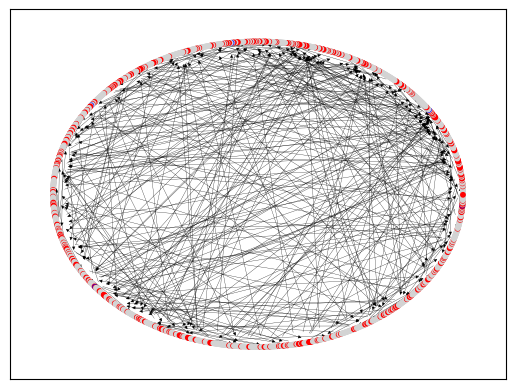

In [44]:
import networkx as nx 
MAX_EDGES = 1000
GIDX = 1
ei = graphs[GIDX].edge_index[:,:MAX_EDGES]
nnodes = ei.max()+1

edge_list = [(e[0].item(),e[1].item()) for e in ei.T]
colors = graphs[GIDX].y[:nnodes]
c_map = ['lightgrey','blue','red']
colors = [c_map[int(c)] for c in colors]

g = nx.DiGraph(edge_list)
pos = nx.circular_layout(g)
nx.draw_networkx_nodes(g, pos, node_color=colors, node_size=10)
_ = nx.draw_networkx_edges(g, pos, width=0.2, arrowsize=5)


In [50]:
from collections import defaultdict
n_parents = defaultdict(lambda : 0)
n_children = defaultdict(lambda : 0)

ei = graphs[GIDX].edge_index
edge_list = [(e[0].item(),e[1].item()) for e in ei.T]
g = nx.DiGraph(edge_list)

for nid in range(nnodes):
    parents = (ei[1] == nid).sum().item()
    children = (ei[0] == nid).sum().item()
    
    n_parents[parents] += 1
    n_children[children] += 1

print("parents", n_parents)
print("children", n_children)
print("Cycles", list(nx.simple_cycles(g)))
print("Undirected Cycles", nx.cycle_basis(g.to_undirected()))

parents defaultdict(<function <lambda> at 0x7f89e1af0ca0>, {1: 847, 0: 328, 2: 269, 9: 10, 8: 11, 5: 21, 23: 1, 3: 36, 7: 12, 16: 1, 12: 6, 6: 12, 60: 1, 10: 5, 20: 1, 22: 2, 21: 1, 40: 1, 18: 1, 32: 1, 4: 20, 11: 3, 67: 1, 13: 2, 28: 3, 25: 1, 14: 1, 19: 1, 29: 1})
children defaultdict(<function <lambda> at 0x7f89eb3a49d0>, {1: 886, 2: 400, 6: 9, 11: 5, 5: 9, 0: 226, 9: 7, 10: 8, 13: 4, 8: 4, 7: 7, 3: 22, 12: 2, 4: 11})
Cycles []
Undirected Cycles [[253, 2755, 1086, 557, 752], [253, 817, 1086, 557, 752], [253, 670, 1963, 1213, 557, 752], [253, 3247, 556, 557, 752], [252, 2624, 3780, 253], [3293, 3501, 253], [110, 1654, 536, 1910, 1909, 3037, 1013, 1012, 3153, 1052, 1657, 1656, 3184, 2176, 3437, 1767, 1768, 1811, 3938, 2785, 765, 766, 1722, 3174, 2378, 2371, 1928, 4153, 2782, 3763, 2792, 2791, 1791, 1790, 2169, 2168, 3503, 3929, 1224, 1223, 4219, 2612, 2611, 1540, 1539, 2766, 1844, 3407, 1175, 1176, 680, 681, 1399, 1400, 2309, 2310, 2596, 2597, 3614, 3615, 3903, 2303, 1162, 1163, 4408,